In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
harshratna_2d_floor_plan_dataset_with_text_descriptions_new_path = kagglehub.dataset_download('harshratna/2d-floor-plan-dataset-with-text-descriptions-new')

print('Data source import complete.')

D:\Anaconda\envs\my_gpu_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Data source import complete.


In [2]:
pip install kagglehub


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [4]:
df = pd.read_pickle(os.path.join(harshratna_2d_floor_plan_dataset_with_text_descriptions_new_path, "word_embeddings_dataframe.pkl"))
df.head()

,File_Name,Text,Image_Path,BERT_Embeddings
0,10017,"The balcony juts out on the south side, with t...",../floorplan_image\10017.png,"[[-0.6216691, -0.029034398, 0.045137372, -0.09..."
1,10042,The balcony is in the southeastern corner of t...,../floorplan_image\10042.png,"[[-0.6944888, 0.015425202, -0.0041255075, -0.1..."
2,10045,"bathroom is in north side of the house, next t...",../floorplan_image\10045.png,"[[-0.6030773, -0.0011889015, 0.045667697, -0.1..."
3,10047,"The balcony is in the north east corner, just ...",../floorplan_image\10047.png,"[[-0.69215715, -0.052971497, 0.03891414, -0.02..."
4,10052,The balcony is on the southwest side of the ap...,../floorplan_image\10052.png,"[[-0.61126614, -0.005761562, -0.054692637, 0.0..."


In [5]:
df[~df['Image_Path'].str.contains("floorplan_image\\", regex=False)]


,File_Name,Text,Image_Path,BERT_Embeddings


In [6]:
import os

def modify_image_path(image_path):
    try:
        # Normalize the path to avoid issues with slashes
        image_path = image_path.replace('/', '\\')  # ensure consistent format

        # Check that 'floorplan_image\' is in the path
        if "floorplan_image\\" in image_path:
            parts = image_path.split("floorplan_image\\", 1)
            filename = parts[1]  # safe because split only once
        else:
            # fallback
            filename = os.path.basename(image_path)
        
        new_path = os.path.join("human_annotated_images", filename)
        return new_path
    except Exception as e:
        print(f"Error processing path: {image_path}, Error: {e}")
        return None


In [7]:
df['Modified_Image_Path'] = df['Image_Path'].apply(modify_image_path)

df.head()

,File_Name,Text,Image_Path,BERT_Embeddings,Modified_Image_Path
0,10017,"The balcony juts out on the south side, with t...",../floorplan_image\10017.png,"[[-0.6216691, -0.029034398, 0.045137372, -0.09...",human_annotated_images\10017.png
1,10042,The balcony is in the southeastern corner of t...,../floorplan_image\10042.png,"[[-0.6944888, 0.015425202, -0.0041255075, -0.1...",human_annotated_images\10042.png
2,10045,"bathroom is in north side of the house, next t...",../floorplan_image\10045.png,"[[-0.6030773, -0.0011889015, 0.045667697, -0.1...",human_annotated_images\10045.png
3,10047,"The balcony is in the north east corner, just ...",../floorplan_image\10047.png,"[[-0.69215715, -0.052971497, 0.03891414, -0.02...",human_annotated_images\10047.png
4,10052,The balcony is on the southwest side of the ap...,../floorplan_image\10052.png,"[[-0.61126614, -0.005761562, -0.054692637, 0.0...",human_annotated_images\10052.png


In [8]:
df.drop(['Image_Path'], axis = 1, inplace = True)

In [9]:
# removed image path folder
df.rename(columns = {'Modified_Image_Path':'Image_Path'}, inplace = True)
df.head()

,File_Name,Text,BERT_Embeddings,Image_Path
0,10017,"The balcony juts out on the south side, with t...","[[-0.6216691, -0.029034398, 0.045137372, -0.09...",human_annotated_images\10017.png
1,10042,The balcony is in the southeastern corner of t...,"[[-0.6944888, 0.015425202, -0.0041255075, -0.1...",human_annotated_images\10042.png
2,10045,"bathroom is in north side of the house, next t...","[[-0.6030773, -0.0011889015, 0.045667697, -0.1...",human_annotated_images\10045.png
3,10047,"The balcony is in the north east corner, just ...","[[-0.69215715, -0.052971497, 0.03891414, -0.02...",human_annotated_images\10047.png
4,10052,The balcony is on the southwest side of the ap...,"[[-0.61126614, -0.005761562, -0.054692637, 0.0...",human_annotated_images\10052.png


In [10]:
# Printing Input Directories
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

In [11]:
DIRECTORY = "/kaggle/input/2d-floor-plan-dataset-with-text-descriptions-new/"

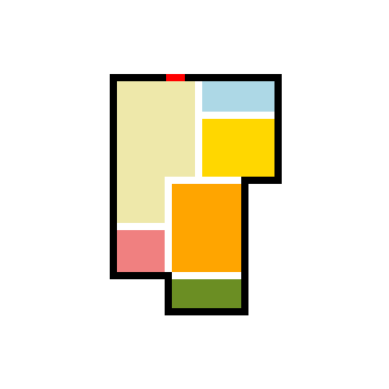

In [12]:
# Displaying an Image
import matplotlib.pyplot as plt
from PIL import Image

# Example image path
image_path = df['Image_Path'][0]

# Open the image
image = Image.open(os.path.join(harshratna_2d_floor_plan_dataset_with_text_descriptions_new_path, image_path))

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image

# Load BERT embeddings and image paths
X_text_embeddings = np.array(df['BERT_Embeddings'].tolist())
image_paths = df['Image_Path'].tolist()

# Load images
X_images = []
for path in image_paths:
    path = os.path.join(harshratna_2d_floor_plan_dataset_with_text_descriptions_new_path, path)
    image = Image.open(path)
    #onvert image to numpy array and normalize if needed
    image_array = np.array(image) / 255.0
    X_images.append(image_array)

# Convert lists to numpy arrays
X_text_embeddings = np.array(X_text_embeddings)
X_images = np.array(X_images)

# Reshape or normalize if required (already done in the provided code)

# Prepare target data (labels)
y = np.arange(len(df))  # Assuming each row corresponds to a unique label

# Split the data into training and testing sets
X_train_text, X_test_text, X_train_images, X_test_images, y_train, y_test = train_test_split(
    X_text_embeddings, X_images, y, test_size=0.2, random_state=42
)

# Display shapes of the data
print("X_train_text shape:", X_train_text.shape)
print("X_train_images shape:", X_train_images.shape)
print("y_train shape:", y_train.shape)
print("X_test_text shape:", X_test_text.shape)
print("X_test_images shape:", X_test_images.shape)
print("y_test shape:", y_test.shape)

X_train_text shape: (3202, 1, 768)
X_train_images shape: (3202, 256, 256, 3)
y_train shape: (3202,)
X_test_text shape: (801, 1, 768)
X_test_images shape: (801, 256, 256, 3)
y_test shape: (801,)


In [14]:
# Reshape the text embeddings to remove the extra dimension
X_train_text = X_train_text.reshape(X_train_text.shape[0], -1)
X_test_text = X_test_text.reshape(X_test_text.shape[0], -1)

# Display shapes after reshaping
print("Reshaped X_train_text shape:", X_train_text.shape)
print("Reshaped X_test_text shape:", X_test_text.shape)


Reshaped X_train_text shape: (3202, 768)
Reshaped X_test_text shape: (801, 768)


In [15]:
# Reshape the text embeddings to remove the extra dimension
X_train_text = X_train_text.reshape(X_train_text.shape[0], -1)
X_test_text = X_test_text.reshape(X_test_text.shape[0], -1)

# Display shapes after reshaping
print("Reshaped X_train_text shape:", X_train_text.shape)
print("Reshaped X_test_text shape:", X_test_text.shape)


Reshaped X_train_text shape: (3202, 768)
Reshaped X_test_text shape: (801, 768)


In [16]:
type(X_train_images)

numpy.ndarray

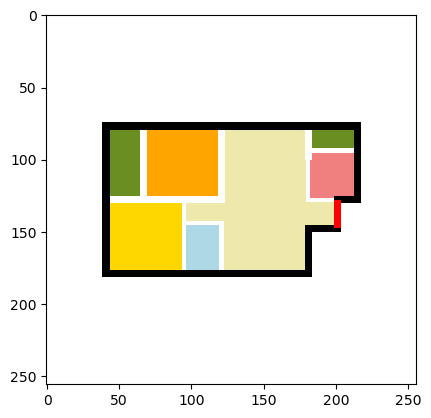

In [17]:
# displaying images
data = X_train_images[2]
from matplotlib import pyplot as plt
plt.imshow(data, interpolation='nearest')
plt.show()

In [28]:
# DO NOT RUN THIS , skip to next cell.
import cv2
resized_images = []

# Define the new dimensions
new_width = 64
new_height = 64

for image in X_train_images:
    resized_img = cv2.resize(image, (new_width, new_height))
    resized_images.append(resized_img)

# Now, resized_images will contain your resized images ready for passing into GAN

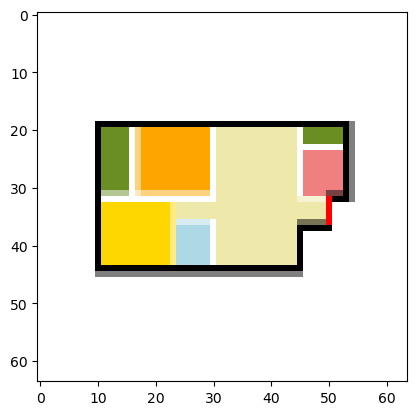

In [29]:
# displaying images
data = resized_images[2]
from matplotlib import pyplot as plt
plt.imshow(data, interpolation='nearest')
plt.show()

In [30]:
X_train_images_resized = np.array(resized_images)

In [31]:
print(X_train_images.shape)
print(X_train_text.shape)

(3202, 256, 256, 3)
(3202, 768)


In [32]:
train_images = X_train_images_resized[:500]
train_text = X_train_text[:500]

In [33]:
print(train_images.shape)
print(train_text.shape)

(500, 64, 64, 3)
(500, 768)


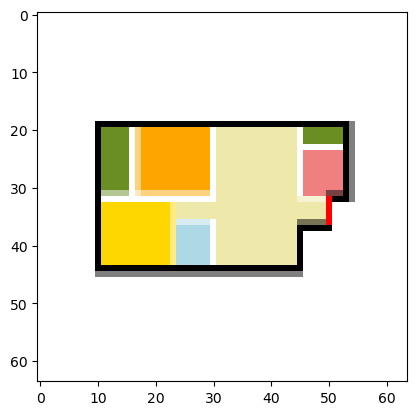

In [34]:
# displaying images
data = X_train_images_resized[2]
from matplotlib import pyplot as plt
plt.imshow(data, interpolation='nearest')
plt.show()

In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_generator(embedding_size):
    model = models.Sequential()

    # Dense layer
    model.add(layers.Dense(8192, input_shape=(embedding_size,)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    # Reshape layer
    model.add(layers.Reshape((4, 4, 512)))

    # Transposed convolutional layers
    model.add(layers.Conv2DTranspose(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', activation='tanh'))

    return model

# Example usage:
generator = build_generator(embedding_size=768)
generator.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 8192)                │       6,299,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 8192)                │          32,768 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_8 (ReLU)                       │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_2 (Reshape)                  │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_8 (Conv2DTranspose) │ (None, 8, 8, 256)           │       3,277,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_9 (ReLU)                       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_9 (Conv2DTranspose) │ (None, 16, 16, 128)         │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_10 (ReLU)                      │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_10                  │ (None, 32, 32, 64)          │         204,864 │
│ (Conv2DTranspose)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_11 (ReLU)                      │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_11                  │ (None, 64, 64, 3)           │           4,803 │
│ (Conv2DTranspose)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,640,259 (40.59 MB)

 Trainable params: 10,622,979 (40.52 MB)

 Non-trainable params: 17,280 (67.50 KB)

In [36]:
def build_discriminator():
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[64, 64, 3]))
    model.add(layers.LeakyReLU(0.2))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(0.2))

    model.add(layers.Conv2D(256, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(0.2))

    model.add(layers.Conv2D(512, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU(0.2))

    # Flatten layer
    model.add(layers.Flatten())

    # Dense layer
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

# Example usage:
discriminator = build_discriminator()
discriminator.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 64)          │           4,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 512)           │       3,277,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,314,753 (16.46 MB)

 Trainable params: 4,314,753 (16.46 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
d_losses = []
g_losses = []

In [38]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses

# Assume build_generator and build_discriminator functions are already defined as previously described.

# Build the generator and discriminator
generator = build_generator(embedding_size=768)
discriminator = build_discriminator()

# GAN Model definition
class GAN(tf.keras.Model):
    def __init__(self, generator, discriminator):
        super(GAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_optimizer, d_optimizer, loss_function):
        super(GAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.loss_function = loss_function

    def train_step(self, data):
        real_images = data[0]
        embeddings = data[1]
        batch_size = tf.shape(real_images)[0]

        # Combine embeddings with noise
        generator_input = embeddings

        # Training the discriminator
        with tf.GradientTape() as disc_tape:
            generated_images = self.generator(generator_input, training=True)

            real_output = self.discriminator(real_images, training=True)
            fake_output = self.discriminator(generated_images, training=True)

            disc_loss = self.loss_function(tf.ones_like(real_output), real_output) + \
                        self.loss_function(tf.zeros_like(fake_output), fake_output)
            d_losses.append(disc_loss)

        # Gradient update for discriminator
        gradients_of_discriminator = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)
        self.d_optimizer.apply_gradients(zip(gradients_of_discriminator, self.discriminator.trainable_variables))

        # Training the generator
        with tf.GradientTape() as gen_tape:
            generated_images = self.generator(generator_input, training=True)
            fake_output = self.discriminator(generated_images, training=True)
            gen_loss = self.loss_function(tf.ones_like(fake_output), fake_output)
            g_losses.append(gen_loss)

        # Gradient update for generator
        gradients_of_generator = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        self.g_optimizer.apply_gradients(zip(gradients_of_generator, self.generator.trainable_variables))


        return {'d_loss': disc_loss, 'g_loss': gen_loss}

# Instantiate the GAN model
gan = GAN(generator=generator, discriminator=discriminator)

gan.compile(
    g_optimizer=optimizers.Adam(1e-4),
    d_optimizer=optimizers.Adam(1e-4),
    loss_function=losses.BinaryCrossentropy()
)



In [39]:
import tensorflow as tf

batch_size = 32
# Assuming train_images and train_text are your image and text data arrays respectively

# Create a dataset from the image and text data
train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_text))

# Shuffle and batch the dataset (optional)
train_dataset = train_dataset.shuffle(buffer_size=500).batch(batch_size)

# Print the shape of the dataset
print(train_dataset.element_spec)


(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None, 768), dtype=tf.float32, name=None))


In [41]:
hist = gan.fit(train_dataset, epochs=100)
gan.save('text-to-architecture.h5')

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - d_loss: 0.3566 - g_loss: 3.3739
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - d_loss: 1.9689 - g_loss: 0.3613
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - d_loss: 1.1346 - g_loss: 1.2980
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - d_loss: 0.9173 - g_loss: 1.2482
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - d_loss: 0.7499 - g_loss: 1.2257
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - d_loss: 1.6677 - g_loss: 1.1767
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - d_loss: 0.6140 - g_loss: 1.5269
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - d_loss: 1.3922 - g_loss: 1.6199
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - d_loss: 0.5889 - g_loss: 1.9403
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - d_loss: 0.4415 - g_loss: 2.2758
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - d_loss: 0.7866 - g_loss: 2.3412
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - d_loss: 0

Shape of random text embeddings: (10, 768)


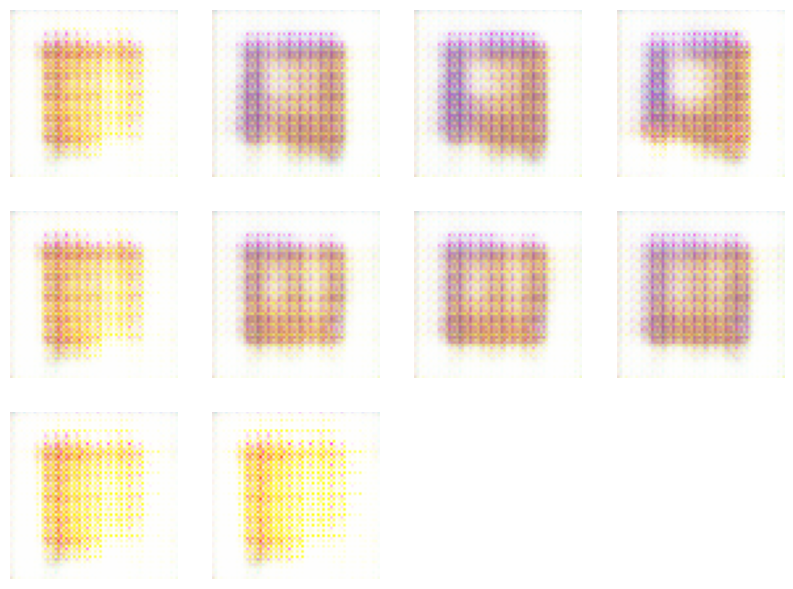

In [42]:
import matplotlib.pyplot as plt

import numpy as np
# Define the number of random text embeddings you want to extract
num_embeddings = 10  # Adjust this number as needed
# Randomly select indices to sample from train_text
random_indices = np.random.choice(train_text.shape[0], size=num_embeddings, replace=False)
# Extract random text embeddings
random_text_embeddings = train_text[random_indices]
# Verify the shape of the random text embeddings
print("Shape of random text embeddings:", random_text_embeddings.shape)

# Combine random noise with text embeddings
generator_input = random_text_embeddings

# Generate images using the generator with only text embeddings as input
generated_images = generator(random_text_embeddings, training=False)

# Plot or print the generated images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(4, 4, i+1)
    plt.imshow((generated_images[i] + 1) / 2)  # Scale image from [-1, 1] to [0, 1] for display
    plt.axis('off')
plt.show()
